In [2]:
import numpy as np
import matplotlib.pyplot as plt

number_of_samples = 200
outlier_perc = 0.1
number_of_outliers = number_of_samples - int ( (1-outlier_perc) * number_of_samples )

# Normal Data
normal_data = np.random.randn(int ( (1-outlier_perc) * number_of_samples ),1)

# Inject Outlier data
outliers = np.random.uniform(low=-9,high=9,size=(number_of_outliers,1))

# Final data set
final_data = np.r_[normal_data,outliers]

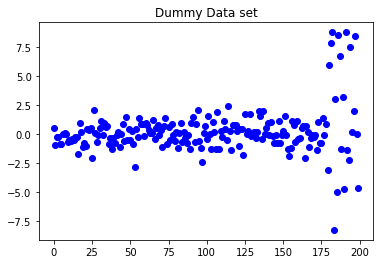

In [5]:
plt.cla()
plt.figure(1)
plt.title("Dummy Data set")
plt.scatter(range(len(final_data)),final_data,c='b')

{'whiskers': [<matplotlib.lines.Line2D at 0x1059ba20>,
 'caps': [<matplotlib.lines.Line2D at 0x105a40f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1059b8d0>],
 'medians': [<matplotlib.lines.Line2D at 0x105a4780>],
 'fliers': [<matplotlib.lines.Line2D at 0x105a4ac8>],
 'means': []}

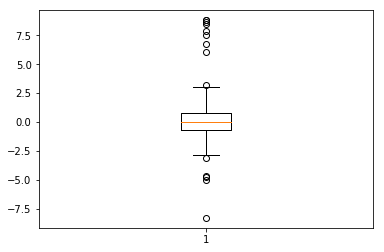

In [6]:
# We can also generate a box plot to observe the outliers using the following code. The
# box plot, also known as box and whisker,

plt.boxplot(final_data)

In [7]:
# One way to remove outliers is to filter the values that lie above the maximum and
# below the minimum marks. To accomplish this task, first we need to calculate the
# inter-quartile range (IQR).

# The inter-quartile range is the difference between the third quartile (quartile75 or Q3)
# and the first quartile (quartile25 or Q1).


## IQR Method Outlier Detection and Removal(filter) ##
quartile75, quartile25 = np.percentile(final_data, [75 ,25])

## Inter Quartile Range ##
IQR = quartile75 - quartile25
print("IQR",IQR)

IQR 1.507942518334798


In [8]:
# Filtering values

# We can filter the values that lie above the maximum value and below the minimum
# value. The minimum value can be calculated by using the formula: quartile25 - (IQR *
# 1.5) and maximum value as quartile75 + (IQR*1.5).

## Calculate Min and Max values ##
min_value = quartile25 - (IQR*1.5)
max_value = quartile75 + (IQR*1.5)
print("Max", max_value)
print("Min", min_value)



Max 3.086611752558705
Min -2.9451583207804872


c:\users\insakum46\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in greater
  This is separate from the ipykernel package so we can avoid doing imports until


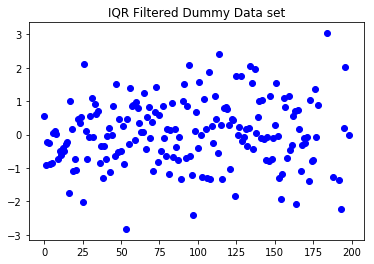

In [9]:
filtered_values = final_data.copy()
filtered_values[ filtered_values< min_value] = np.nan
filtered_values[ filtered_values > max_value] = np.nan

#Check filtered data
plt.cla()
plt.figure(1)
plt.title("IQR Filtered Dummy Data set")
plt.scatter(range(len(filtered_values)),filtered_values,c='b')

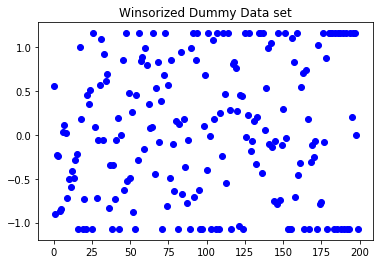

In [12]:
# Winsorizing
# Winsorizing is the method to replace extreme values with smaller absolute values. It
# orders the non-null values in numeric columns, computes the tail values, and then
# substitutes the tail values by the defined parameter.

# We can use the winsorize method from the SciPy package to deal with outliers

##### Winsorization ####
from scipy.stats.mstats import winsorize
# import statsmodels.api as sm
limit = 0.15
winsorized_data = winsorize(final_data,limits=limit)
#Check winsorized data
plt.cla()
plt.figure(1)
plt.title("Winsorized Dummy Data set")
plt.scatter(range(len(winsorized_data)),winsorized_data,c='b')

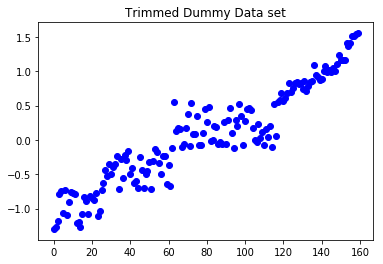

In [11]:
# Trimming : Trimming is the same as winsorizing, except the tail values are just cropped out.

### Trimming Outliers ###
from scipy import stats
trimmed_data = stats.trimboth(final_data, 0.1)
#Check trimmed data
plt.cla()
plt.figure(1)
plt.title("Trimmed Dummy Data set")
plt.scatter(range(len(trimmed_data)),trimmed_data,c='b')